```
Name: Andrea Fox
Date: July 4, 2020
Class: DSC550-T301
Assignment: Term Project
```

## Downloaded Data From: http://biostat.mc.vanderbilt.edu/wiki/Main/DataSets

### Here are the column headers for the dataframe
* pclass = Passenger Class
* survived = (0 = No, 1 = Yes)
* name = Name of passenger
* sex = Passenger sex
* age = Passenger age
* sibsp = Number of siblings/spouses aboard
* parch = Parents/children aboard
* ticket = Ticket number
* fare = Cost of fare
* cabin = Cabin
* embarked = (S = Southampton; C = Cherbourg; Q = Queenstown)
* boat = Lifeboat
* body = body number
* home.dest = Home destination

* Referenced from: https://modeloriented.github.io/EIX/reference/titanic_data.html

In [150]:
#Importing libraries to help with loading, cleaning, and visualizing data
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Part 1 - Load data

In [151]:
#Reading in the csv file I plan to use
data = pd.read_excel("titanic3.xls")
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [153]:
data.describe()

#Looking at this I'm able to see there is 38% surival on the Titanic
#I can also see age wise the youngest was 0< and the oldest 80 with 29/30 being the average age of passenger
#Interestingly 3rd class had the most people with 1st class having the least and 2nd class being the average

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


# Part 2 - Clean Data

In [154]:
#Updating column names to make more sense and reduce scrolling to top of notebook
old_names = ["sibsp","pclass","parch", "home.dest"]
new_names = ["#siblings","ticket_class", "#parents", "home_destination"]

#Make a mapping from old names to new names
old_to_new = dict(zip(old_names, new_names))

#rename
data.rename(old_to_new, axis = 'columns', inplace = True)
print(data.columns.values)

['ticket_class' 'survived' 'name' 'sex' 'age' '#siblings' '#parents'
 'ticket' 'fare' 'cabin' 'embarked' 'boat' 'body' 'home_destination']


In [155]:
#Updating the column 'sex' so values will be numeric, which will be easier to work with later on
data['sex'] = data['sex'].map({'male': 0,'female': 1})
data

,ticket_class,survived,name,sex,age,#siblings,#parents,ticket,fare,cabin,embarked,boat,body,home_destination
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",1,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",1,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",0,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",0,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [156]:
#Now I want to start looking for empty values and make a determination on whether to keep or discard
data.isnull().sum()

ticket_class           0
survived               0
name                   0
sex                    0
age                  263
#siblings              0
#parents               0
ticket                 0
fare                   1
cabin               1014
embarked               2
boat                 823
body                1188
home_destination     564
dtype: int64

In [157]:
#After seeing my null values I can safely say I don't need boat, body, cabin, and home.dest as they are not needed for my questions
new_data = data.drop(['boat', 'body', 'cabin','home_destination'], axis = 1)
new_data

,ticket_class,survived,name,sex,age,#siblings,#parents,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",1,14.5000,1,0,2665,14.4542,C
1305,3,0,"Zabour, Miss. Thamine",1,NaN,1,0,2665,14.4542,C
1306,3,0,"Zakarian, Mr. Mapriededer",0,26.5000,0,0,2656,7.2250,C
1307,3,0,"Zakarian, Mr. Ortin",0,27.0000,0,0,2670,7.2250,C


In [158]:
#It would make sense to combine siblings and parents into one, so it's easier to see alone vs not alone 
for data in new_data:
    new_data['relatives'] = new_data['#siblings'] + new_data['#parents']
    new_data.loc[new_data['relatives'] > 0, 'not_alone'] = 0
    new_data.loc[new_data['relatives'] == 0, 'not_alone'] = 1
    new_data['not_alone'] = new_data['not_alone'].astype(int)
    
new_data['not_alone'].value_counts()

#So here we can see that 790 passengers were alone, while 519 were not alone

1    790
0    519
Name: not_alone, dtype: int64

In [159]:
#I need to do something with the 263 null age values
for data in new_data:
    mean = new_data['age'].mean()
    std = new_data['age'].std()
    is_null = new_data['age'].isnull().sum()
    
    #Computing random numbers between the mean, std, and is_null
    random_age = np.random.randint(mean - std, mean + std, size = is_null)
    
    #Need to fill in the null values in age with random values generated
    age_slice = new_data['age'].copy()
    age_slice[np.isnan(age_slice)] = random_age
    new_data['age'] = age_slice
    new_data['age'] = new_data['age'].astype(int)

#Print out null age values to check the filling in of random values worked
new_data['age'].isnull().sum()

#I don't normally like to fill in my null values as I think that messes with the integrity of the data, but here it made sense as age is one of the main variables

0

In [160]:
new_data['bin'] = pd.cut(new_data['age'], [-1, 10, 20, 40, 60, 100], labels=['0-10', '10-20', '20-40', '40-60', '60-100'])

In [161]:
#I want to see where my data stands now, which I think I'm ready to do some visualizations 
new_data

,ticket_class,survived,name,sex,age,#siblings,#parents,ticket,fare,embarked,relatives,not_alone,bin
0,1,1,"Allen, Miss. Elisabeth Walton",1,29,0,0,24160,211.3375,S,0,1,20-40
1,1,1,"Allison, Master. Hudson Trevor",0,0,1,2,113781,151.5500,S,3,0,0-10
2,1,0,"Allison, Miss. Helen Loraine",1,2,1,2,113781,151.5500,S,3,0,0-10
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30,1,2,113781,151.5500,S,3,0,20-40
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25,1,2,113781,151.5500,S,3,0,20-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",1,14,1,0,2665,14.4542,C,1,0,10-20
1305,3,0,"Zabour, Miss. Thamine",1,21,1,0,2665,14.4542,C,1,0,20-40
1306,3,0,"Zakarian, Mr. Mapriededer",0,26,0,0,2656,7.2250,C,0,1,20-40
1307,3,0,"Zakarian, Mr. Ortin",0,27,0,0,2670,7.2250,C,0,1,20-40


# Part 3 - Visualize Data 

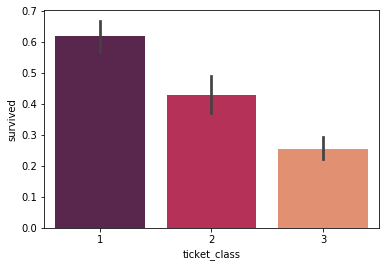

In [162]:
#First I want to look at survival rate based off of class
sns.barplot(x = 'ticket_class', y = 'survived', data = new_data, palette = 'rocket')

```
I have never used seaborn before, but found some references that had so I decided to give it at try. Plus I remember in another class seaborn was talked about and was suggested to load libarary regardless of use or not because it enhanced matplotlib. 

Looking at my barplot by class it's easy to see that 1st class had a much higher survival rate compared to 2nd and 3rd classes.
```

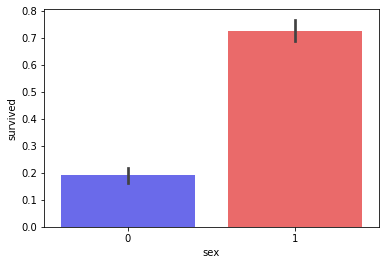

In [163]:
#Using the same idea, plotting survival rate based off of sex
sns.barplot(x = 'sex', y = 'survived', data = new_data, palette = 'seismic')

```
Remember, we assigned 0 = male, 1 = female
Survival rate was much higher for females vs males, which holds up as multiple sources mention that women and children were the first to board lifeboats. 
```

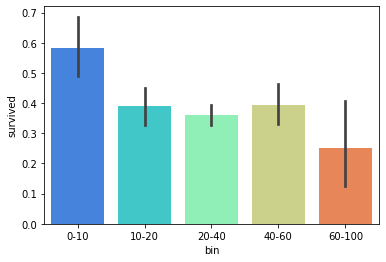

In [164]:
#Plot survival rate by age groups
sns.barplot(x = 'bin', y = 'survived', data = new_data, palette = 'rainbow')

```
I created bins to make it easier to look at visually and for evaluation later on. Looking at this barplot it's easy to see the age group of 0-10 had a much higher survival rate than any other age group. The lowest rate of survival was 60-100, but this could also be because there were less passengers that fell within this age range. 
```

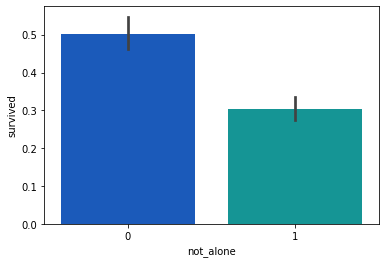

In [165]:
#Plot survival rates based of alone or traveling with others
sns.barplot(x = 'not_alone', y = 'survived', data = new_data, palette = 'winter')

```
Here we can see survival rate was higher for group 0, which is the group that travelled with others. Group 1 had a lower surival rate even though they were single passengers and consisted of more people in total.
```

# Part 4 - Calculations

In [166]:
#Loading libraries that will help with algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [167]:
#Creating my X_train and Y_train variables
X_train = new_data[['ticket_class','age', 'sex', 'relatives', 'not_alone']]
Y_train = new_data["survived"]

In [168]:
#Stochastic Gradient Descent (SGD)
gd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
sgd.score(X_train, Y_train)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

In [169]:
#Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [170]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

In [171]:
#K Nearest Neighbor
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [172]:
#Gaussian Naive Bayes
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [173]:
#Perceptron
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

C:\Users\Andrea\OneDrive\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [174]:
#Linear Support Vector Machine
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

C:\Users\Andrea\OneDrive\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [175]:
#Decision Tree
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [176]:
#Taking the the different types and creating a dataframe showing which model would be best fit
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
88.92,Random Forest
88.92,Decision Tree
84.19,KNN
79.60,Logistic Regression
79.45,Support Vector Machines
78.38,Stochastic Gradient Decent
78.30,Naive Bayes
38.27,Perceptron


In [177]:
#Feature Importance is a part of random tree. It measures the realtive importance of each feature
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(10)

,importance
feature,
age,0.413
sex,0.349
ticket_class,0.134
relatives,0.088
not_alone,0.016


```
Looking at the measurement of importance based off of my X_train subset age was the highest importance while sex fell in the middle and not_alone fell to the very bottom. I feel like this all falls in line with my expectations. I felt age, sex, and ticket_class had the the most important vs being alone or not alone. 
```

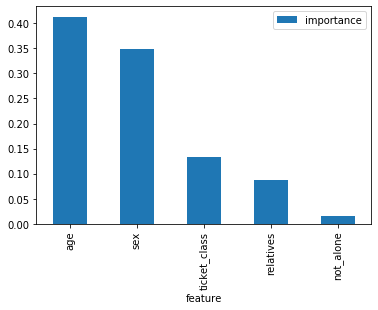

In [178]:
#Just in case the table doesn't convey importance enough, I wanted to plot it for the visual effect. 
importances.plot.bar()

In [179]:
#Dropping the two features that scored lowest on feature importance
X_train = X_train.drop('relatives', axis = 1)
X_train = X_train.drop('not_alone', axis = 1)

In [188]:
#Measuring OOB (out-of-bag), which also is another way to measure accuracy of the model
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 78.14999999999999 %


In [189]:
#Finding Precision and Recall scores
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.4063745019920319
Recall: 0.408


```
On precision and recall score I actually expected this to go better. Precision meausres 41% of survival correctly, while recall predicted that 41% of people that actually survived. The resource that I found this from had better scores than I did, so I'm wondering if the fact that I did it a little differently than they did has this big of an effect on the precision and recall scores. 
```

In [190]:
#F score is a combination of precision and recall. 
from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

0.40718562874251496

```
Again this is not very high, so I'm wondering if my model is accurate as I think. I believe the data answers my questions and follows my expectations. However, the scores of accuracy doesn't support as much as I thought or as much as what I found in my resource. I didn't use y_pred like the resource because I didn't have passenger ID in my dataset. I didn't use the kaggle dataset that most of the references I found. 
```

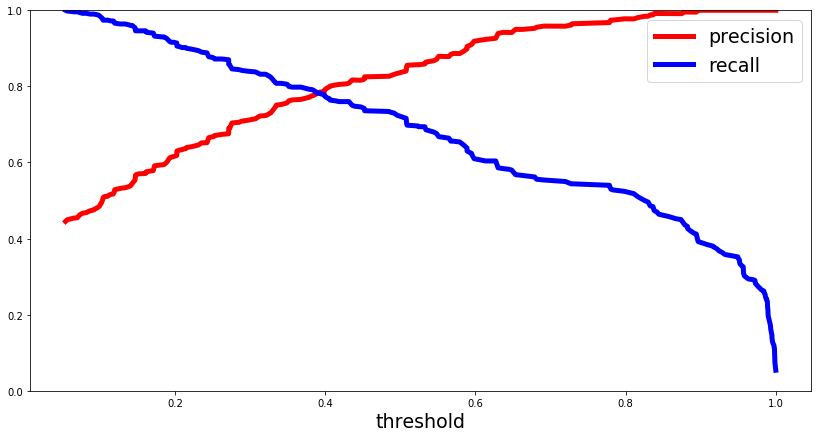

In [191]:
#Plotting precision and recall using threshold.
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

```
The plot shows the sharp drop down around 40ish%, which supports my earlier scores.
```

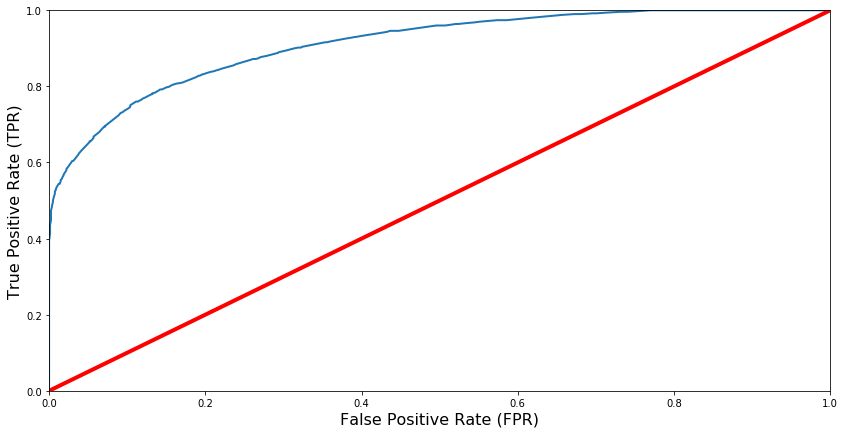

In [192]:
#Plotting ROC AUC curve 
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

```
This plots the true positivity rate. The red line represents a random rate, while the blue line is our classifier. Where I found this says that you want your blue line to be as far away from the red line as possible, so our classifier looks good here. Looking at the blue line it looks like we have more actual positive rates, but from what I have read it says that your false positive rate will increasethe more the true positivity rate increases. 
```

In [193]:
#Compute the actual ROC-AUC score. 
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9108454882571075


```
Considering I was worried about my model not necessarily being the best earlier this score of 93% is not bad.

https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5#:~:text=AUC%20%2D%20ROC%20curve%20is%20a,degree%20or%20measure%20of%20separability.&text=By%20analogy%2C%20Higher%20the%20AUC,with%20disease%20and%20no%20disease.

This link explains the ROC-AUC Score. ROC is a probability curve, while AUC looks at the "measure of separability." The higher the score the better the model.
```